## Data analysis and Visualization Notebook

This notebook is dedicated to the exploration of sentiment scores derived from Environmental, Social, and Governance (ESG) data alongside various financial metrics of companies. We conduct a series of regression analysis, alongside with corresponding visualization.

### Load packages and define the fucntions for data analysis and visualization

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.head()

,roe,asset,solvency,Total ESG Sentiment,Total Environmental Sentiment,Total Social Sentiment,Total Governance Sentiment,Content,sic,asset_log,roe_asset_log,roe_solvency,asset_log_solvency,industry
0,22.187,243197000.0,31.535,0.119221,0.026416,0.045186,0.047619,"['Directors, Executive Officers and Corporate ...",5331,19.309382,428.417267,699.667045,608.921373,Retail Trade
1,18.604,527854000.0,38.244,0.133490,0.030262,0.052791,0.050437,"['Directors, Executive Officers, and Corporate...",5961,20.084330,373.648881,711.491376,768.105128,Retail Trade
2,25.773,376317000.0,54.423,0.195756,0.099589,0.039699,0.056468,"['Directors, Executive Officers and Corporate ...",2911,19.745942,508.912174,1402.643979,1074.633425,Manufacturing
3,7.925,228275000.0,31.109,0.141513,0.019832,0.074286,0.047395,"['Directors, Executive Officers and Corporate ...",5912,19.246062,152.525038,246.538825,598.725730,Retail Trade
4,33.869,68994000.0,36.319,0.136957,0.040946,0.039534,0.056477,"['Directors, Executive Officers and Corporate ...",5331,18.049530,611.319535,1230.088211,655.540884,Retail Trade


In [4]:
def plot_sentiment_by_industry(score, plt_title, x_label):
    """
    Plot the average sentiment scores by industry in a horizontal bar chart.

    Parameters:
    - score (str): The name of the column in the DataFrame 'df' that contains the sentiment scores to be plotted.
    - plt_title (str): The title of the plot.
    - x_label (str): The label for the x-axis, typically describing the sentiment score measure.

    Returns: (none)
    """
    
    sns.set_style("whitegrid")

    # Group by 'industry', calculate mean
    industry_means = df.groupby('industry').mean()

    # Create a bar plot
    plt.figure(figsize=(20, 12))
    barplot = sns.barplot(x=score, y=industry_means.index, data=industry_means,
                          palette='coolwarm', orient='h')

    # Add titles and labels for clarity
    plt.title(plt_title, fontsize=20)
    plt.xlabel(x_label, fontsize=18)
    plt.ylabel('Industry', fontsize=20)

    barplot.tick_params(labelsize=16)
    # Annotate each bar with its value for clearer reading
    for p in barplot.patches:
        width = p.get_width()
        plt.text(width + 0.01,  # position text slightly right
                 p.get_y() + p.get_height() / 2,  # y position at center of the bar
                 '{:1.2f}'.format(width),  # format value
                 ha='left',  # align text left
                 va='center')  # vertically center

    # Show the plot
    plt.show()

In [5]:
def word_cloud_plot(text):
    """
    Generate and display a word cloud from a given text.

    Parameters:
    - text (str): The input text from which to generate the word cloud.

    Returns: (none)
    """
    
    # Add or remove stopwords to the set
    stopwords = set(STOPWORDS)
    stopwords.update(['xa0', 'U',"S","Company","business","product","result","may"])

    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(all_text)

    # Display the generated image:
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

In [6]:
def plot_heatmap(X,y):
    """
    Plot a heatmap showing the correlation between different variables in the dataset.

    Parameters:
    - X (DataFrame): A pandas DataFrame containing the independent variables.
    - y (Series): A pandas Series containing the dependent variable.

    Returns: (none)
    """
    
    sns.heatmap(pd.concat([X,y], axis=1).corr(), annot = True)
    plt.show()

In [7]:
def plot_pairplot(X,y):
    """
    Plot pairplot to visualize the relationships between all pairs of variables in the dataset.

    Parameters:
    - X (DataFrame): A pandas DataFrame containing the independent variables.
    - y (Series): A pandas Series containing the dependent variable.

    Returns: (none)
    """
    
    sns.pairplot(pd.concat([X,y], axis=1))
    plt.show()

In [8]:
def olsreg_heteroskedasticity(X,y):
    """
    Fit an Ordinary Least Squares (OLS) regression model to the given data, with adjustments for heteroskedasticity using HC3 standard errors.

    Parameters:
    - X (DataFrame): The independent variables as a pandas DataFrame. Each column represents a different variable.
    - y (Series): The dependent variable as a pandas Series.

    Returns:
    - model (RegressionResults): The fitted OLS model object from statsmodels. This object contains various statistics about the fitted model, including coefficients, p-values, and adjusted R-squared, among others.
    """
    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    X_scaled = sm.add_constant(X_scaled)
    y = y.reset_index(drop=True)
    model = sm.OLS(y, X_scaled).fit(cov_type='HC3')
    
    return model

In [9]:
def plot_residual_analysis(model, var):
    """
    Plot residual analysis for a given variable from a fitted OLS model.

    Parameters:
    - model (OLS): The fitted OLS model from statsmodels.
    - var (str): The name of the variable for which to perform residual analysis.

    Returns: (none)
    """
    
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model, var, fig=fig)
    plt.show()

## Discriptive analysis

### Distribution of ESG Sentiment

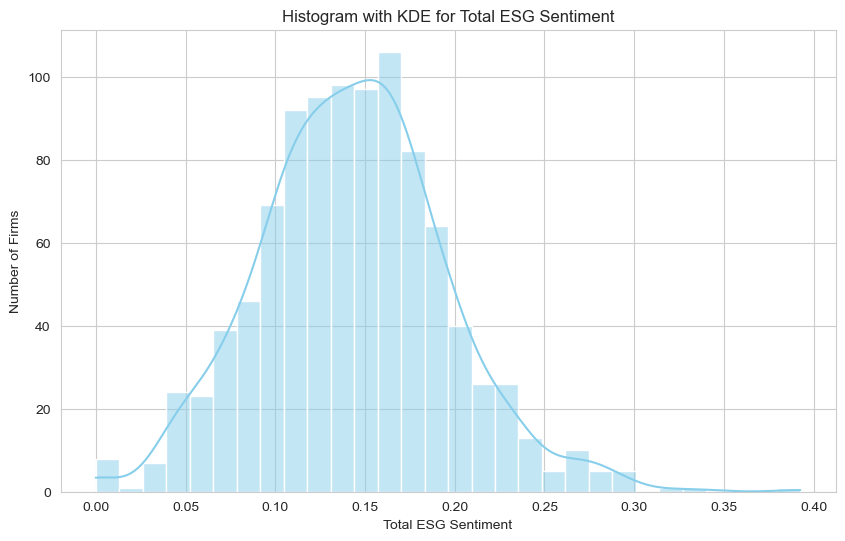

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Total ESG Sentiment"], kde=True, color='skyblue')
plt.title('Histogram with KDE for Total ESG Sentiment')
plt.xlabel('Total ESG Sentiment')
plt.ylabel('Number of Firms')
plt.show()

### Average Sentiment Scores by Industry

/var/folders/9m/3pt7gq7j6n10y2dscslk9x1c0000gn/T/ipykernel_28725/4071920322.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  industry_means = df.groupby('industry').mean()


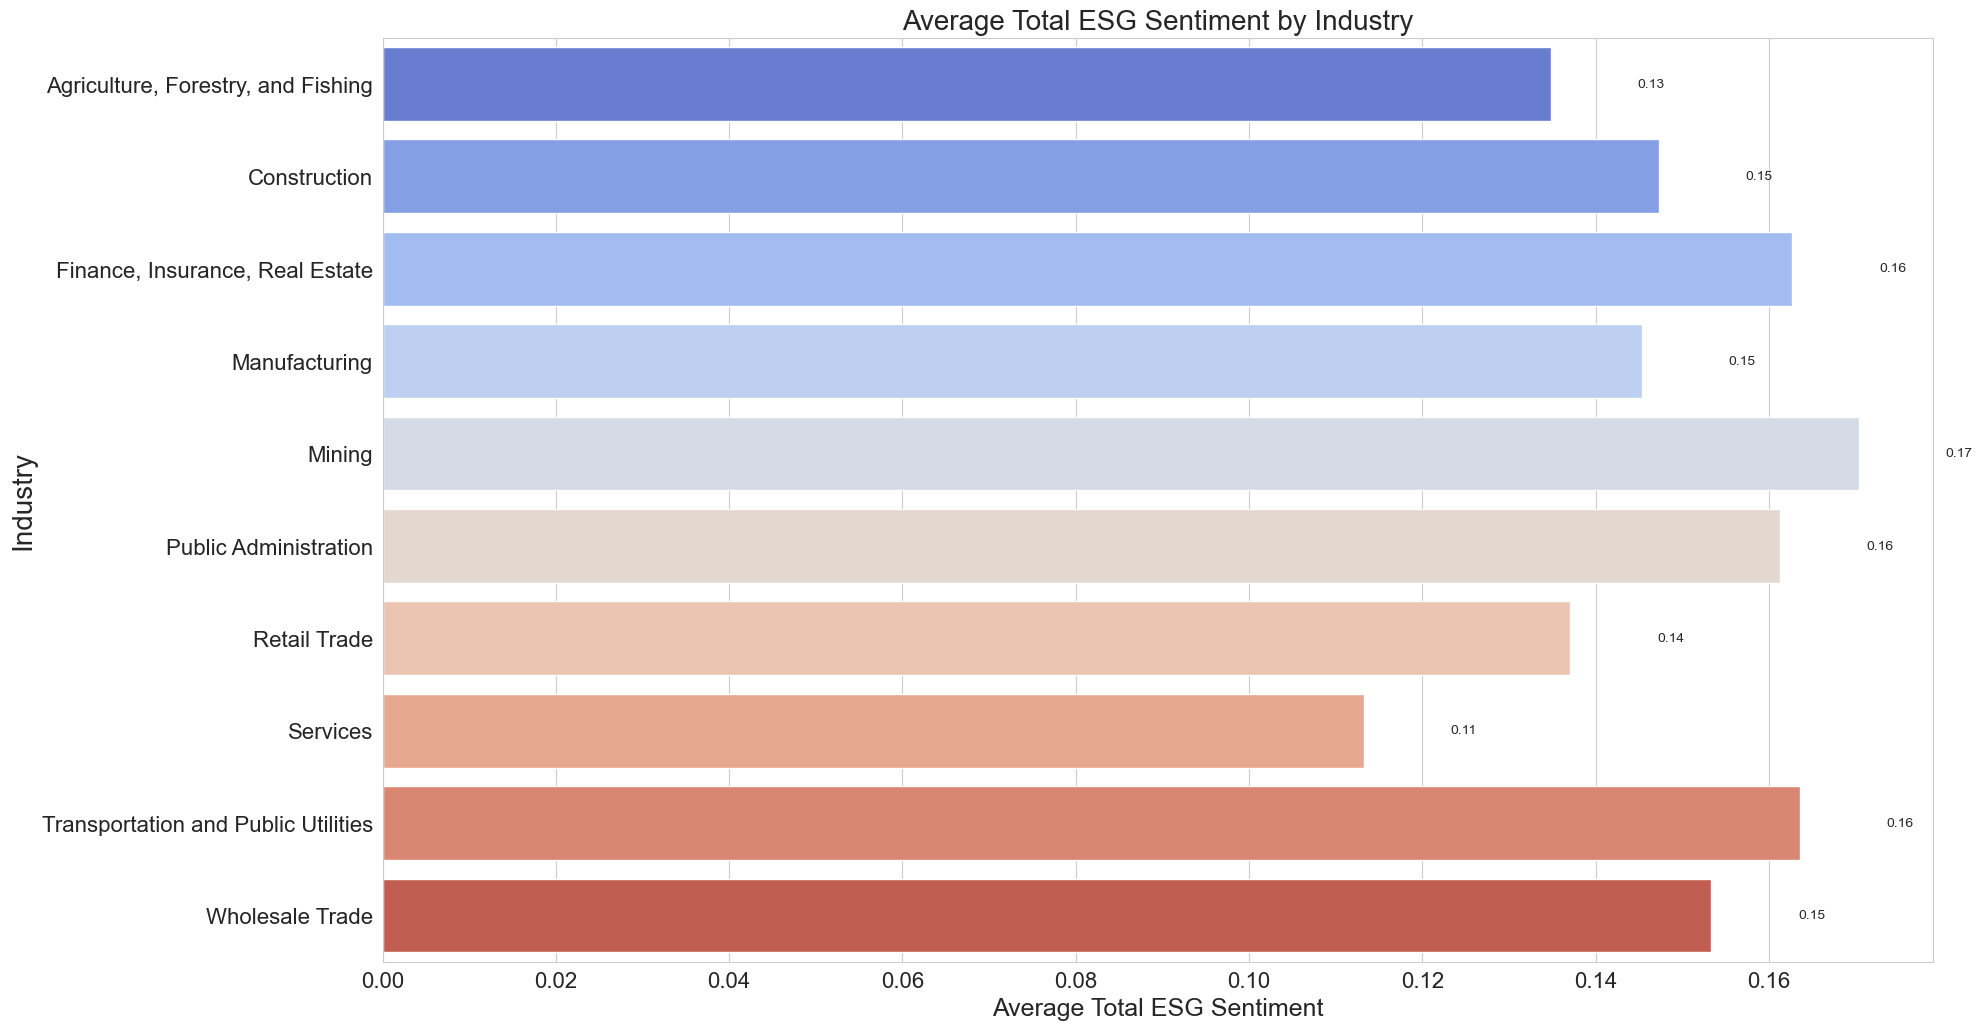

In [10]:
plot_sentiment_by_industry('Total ESG Sentiment', 
                           'Average Total ESG Sentiment by Industry', 
                           'Average Total ESG Sentiment')

/var/folders/9m/3pt7gq7j6n10y2dscslk9x1c0000gn/T/ipykernel_28725/4071920322.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  industry_means = df.groupby('industry').mean()


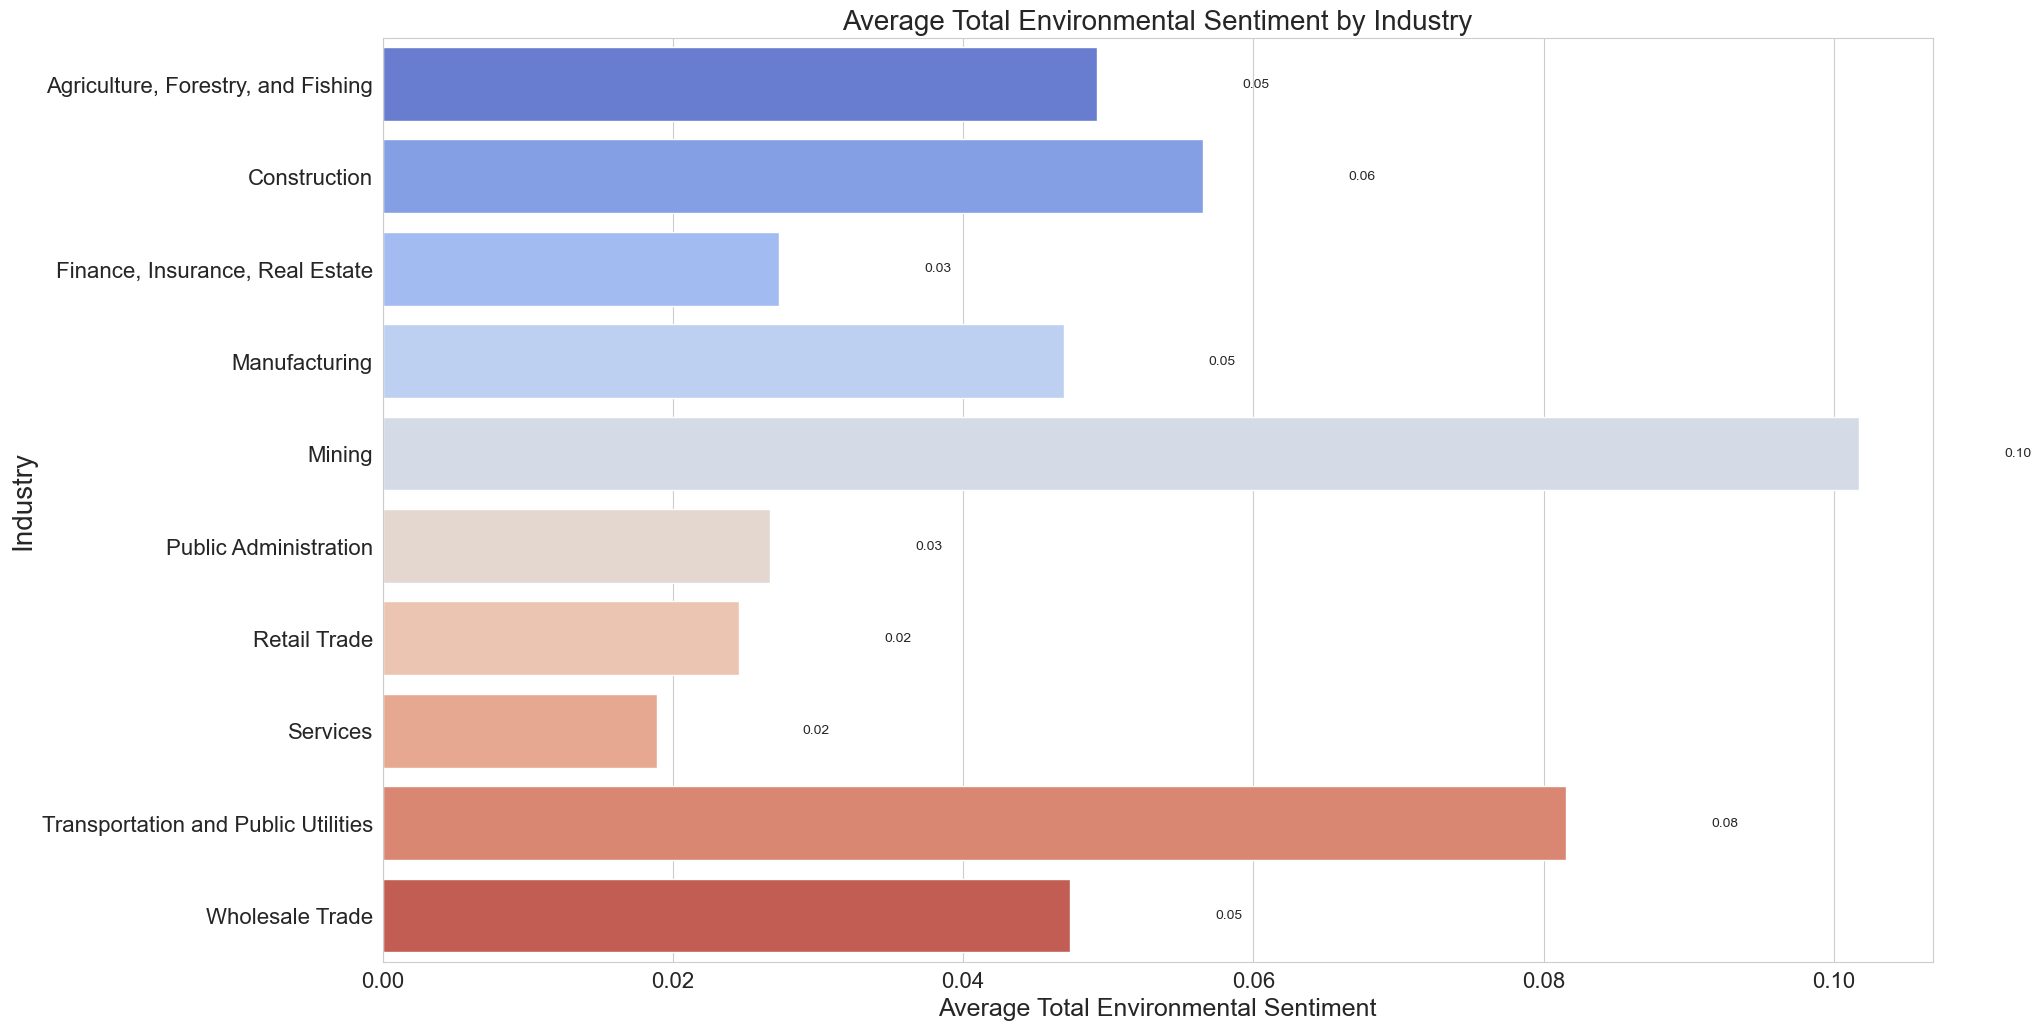

In [11]:
plot_sentiment_by_industry("Total Environmental Sentiment",
                           'Average Total Environmental Sentiment by Industry',
                           'Average Total Environmental Sentiment')

/var/folders/9m/3pt7gq7j6n10y2dscslk9x1c0000gn/T/ipykernel_28725/4071920322.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  industry_means = df.groupby('industry').mean()


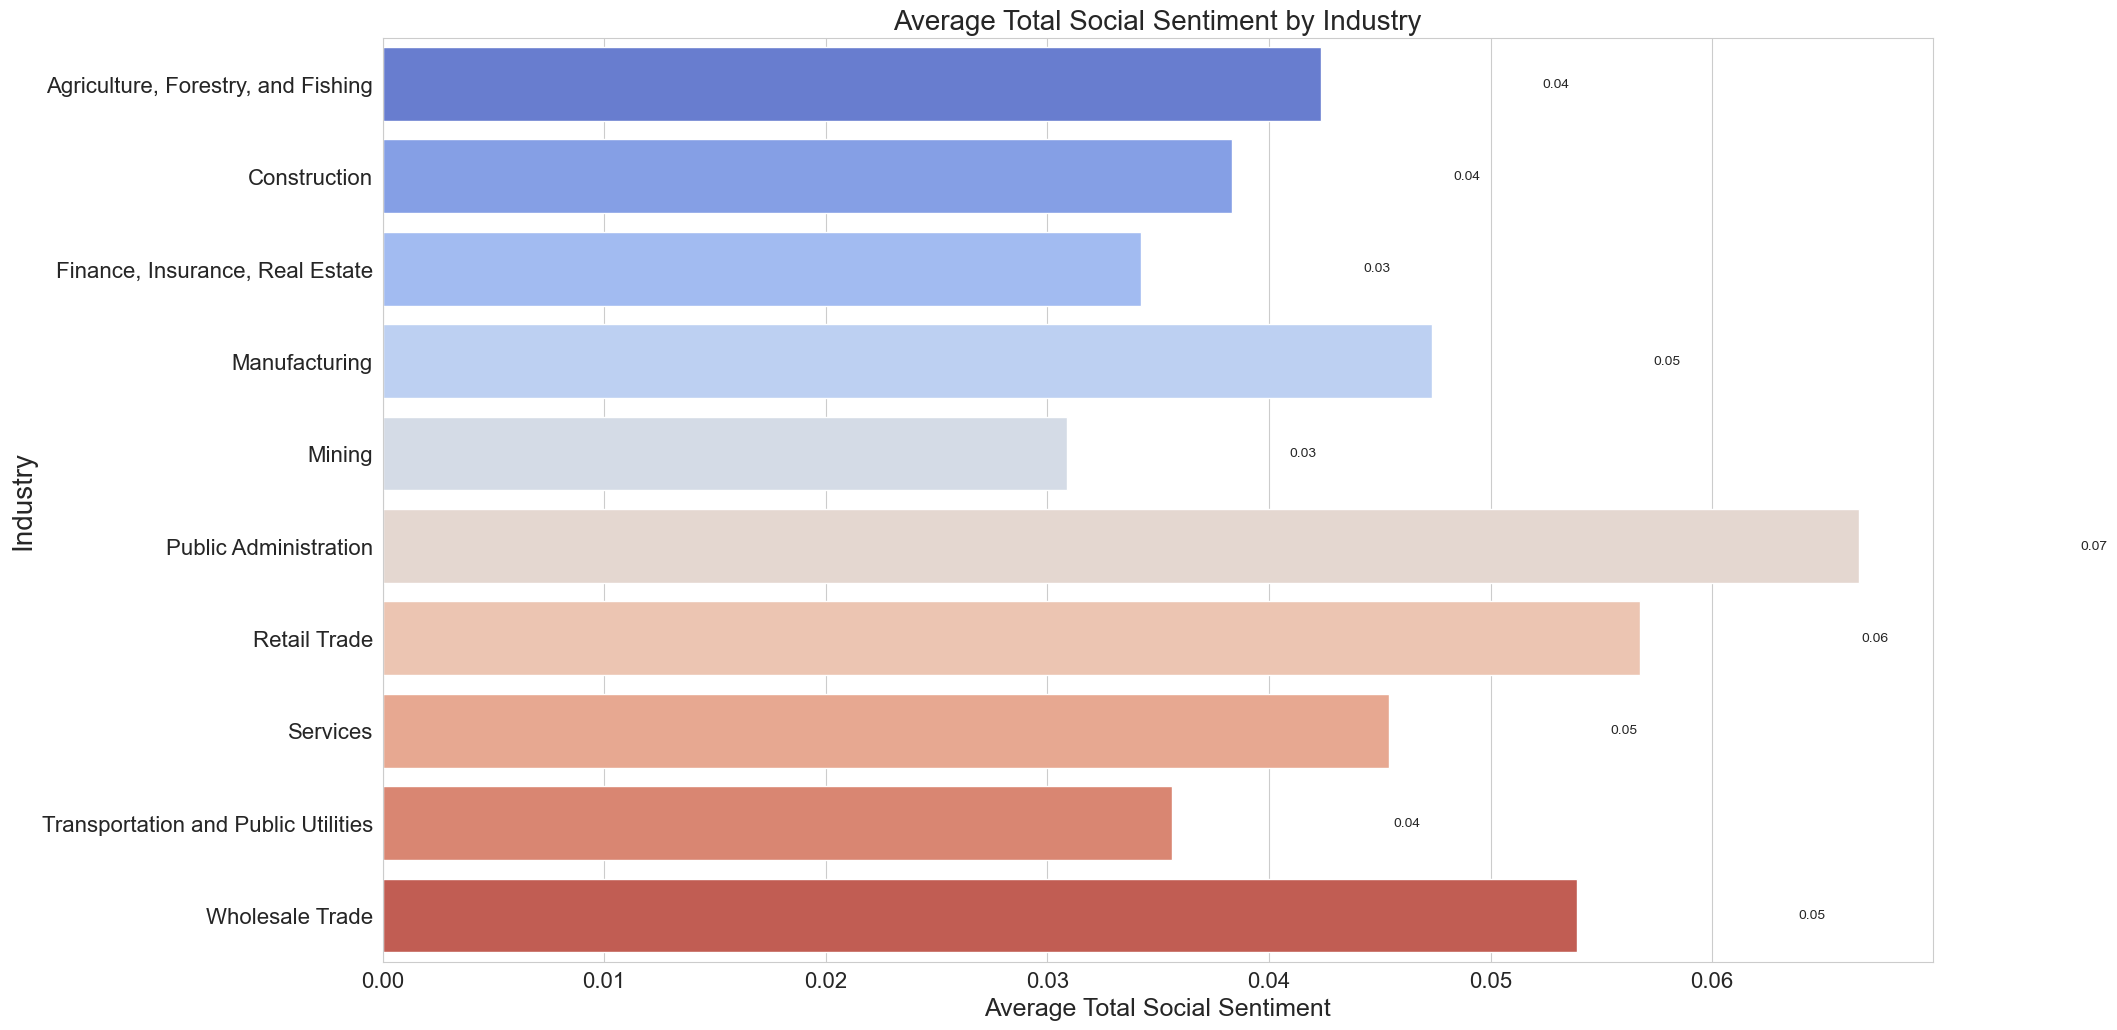

In [12]:
plot_sentiment_by_industry("Total Social Sentiment",
                           'Average Total Social Sentiment by Industry',
                           'Average Total Social Sentiment')

/var/folders/9m/3pt7gq7j6n10y2dscslk9x1c0000gn/T/ipykernel_28725/4071920322.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  industry_means = df.groupby('industry').mean()


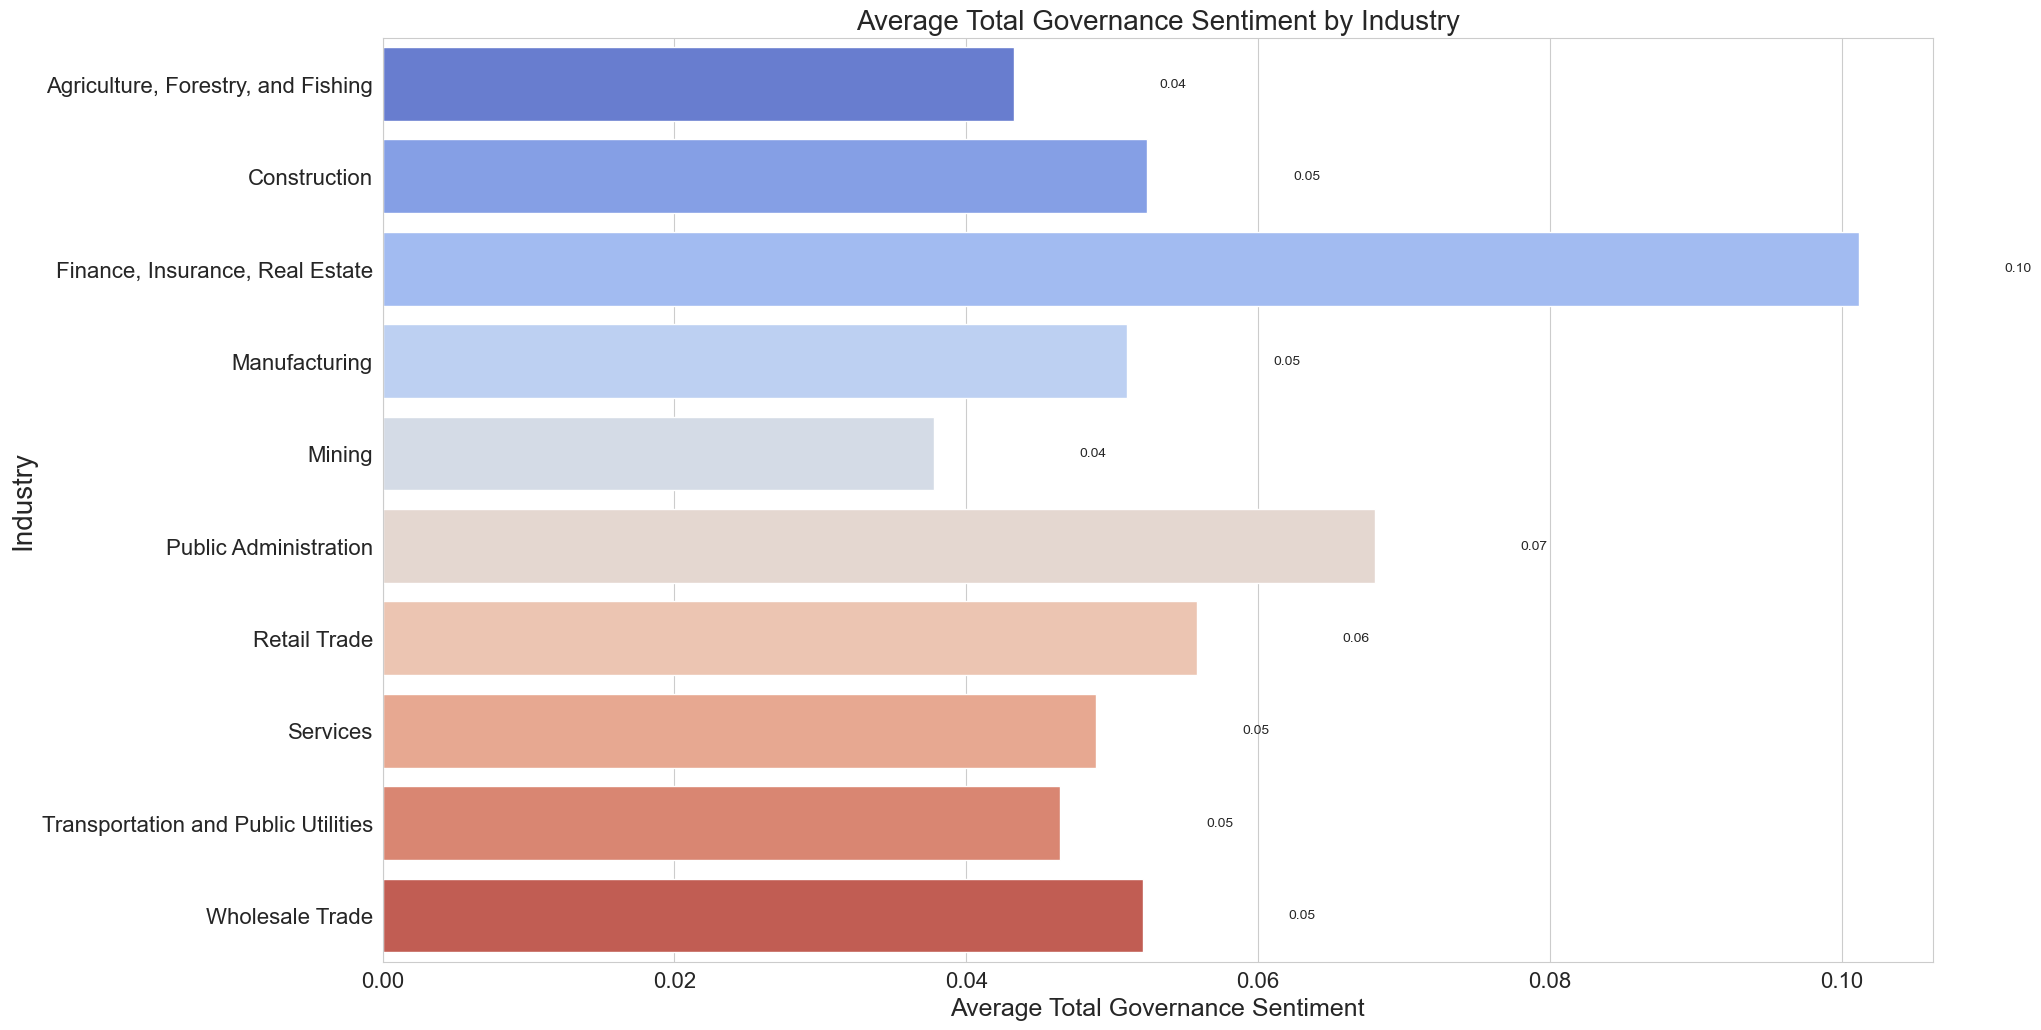

In [13]:
plot_sentiment_by_industry('Total Governance Sentiment',
                           'Average Total Governance Sentiment by Industry',
                           'Average Total Governance Sentiment')

### Distribution of ESG Sentiment by Firm Size

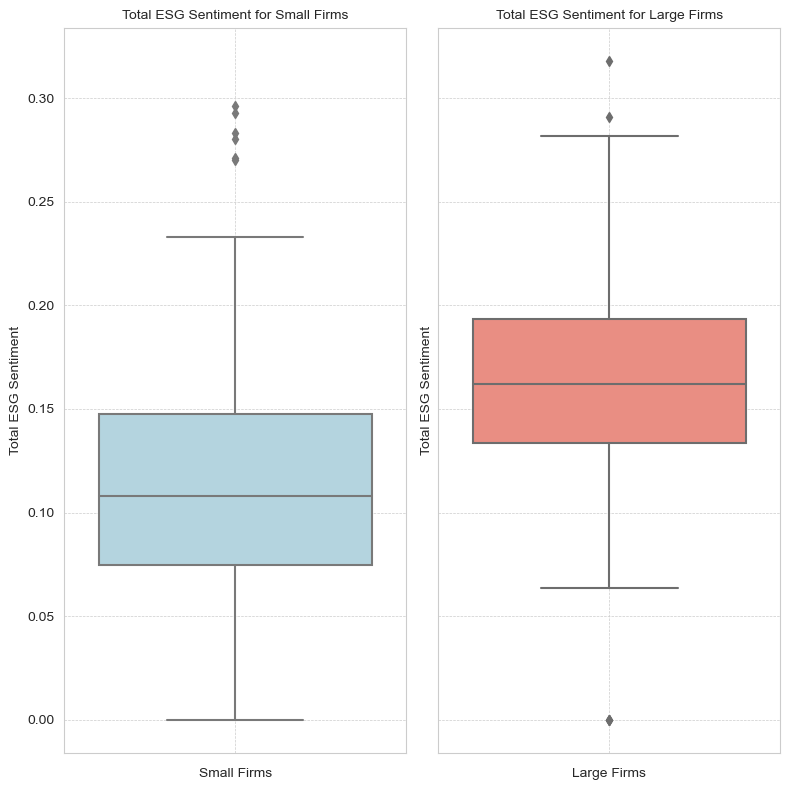

In [16]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and a set of subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(8, 8), sharey=True)  # 1 row, 2 columns, with shared y-axis

# Boxplot for 'Total ESG Sentiment' for small firms
sns.boxplot(y=df['Total ESG Sentiment'][df['asset_log'] <= 13.76], ax=axs[0], color='lightblue')
axs[0].set_title('Total ESG Sentiment for Small Firms', fontsize=10)
axs[0].set_xlabel('Small Firms', fontsize=10)
axs[0].set_ylabel('Total ESG Sentiment', fontsize=10)

# Boxplot for 'Total ESG Sentiment' for large firms
sns.boxplot(y=df['Total ESG Sentiment'][df['asset_log'] > 16.12], ax=axs[1], color='salmon')
axs[1].set_title('Total ESG Sentiment for Large Firms', fontsize=10)
axs[1].set_xlabel('Large Firms', fontsize=10)
#axs[1].set_ylabel('Total ESG Sentiment', fontsize=12)  # No need to set again due to shared y-axis

# Customize further
axs[0].grid(True, which='major', linestyle='--', linewidth=0.5)
axs[1].grid(True, which='major', linestyle='--', linewidth=0.5)

# Adjust the layout so that the titles and labels don't overlap and everything fits
plt.tight_layout()

# Display the boxplots
plt.show()

### Distribution of ESG Sentiment by Firm Performance

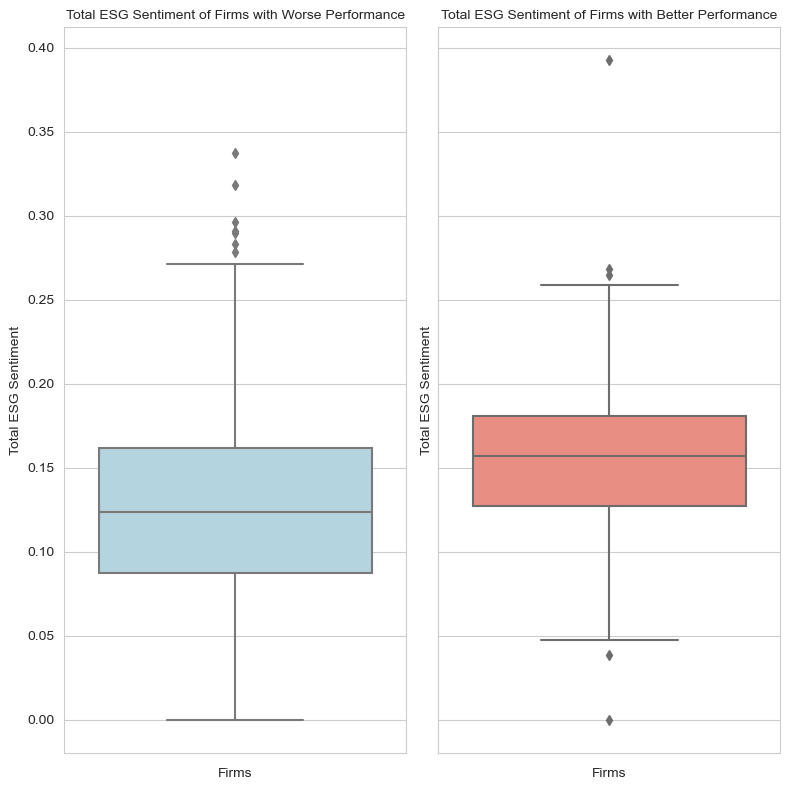

In [17]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and a set of subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(8, 8), sharey=True)  # 1 row, 2 columns, with shared y-axis

# First subplot for 'Total ESG Sentiment' where 'roe' <= 5
sns.boxplot(y=df['Total ESG Sentiment'][df['roe'] <= 5], ax=axs[0], color='lightblue')
axs[0].set_title('Total ESG Sentiment of Firms with Worse Performance', fontsize=10)
axs[0].set_xlabel('Firms', fontsize=10)
axs[0].set_ylabel('Total ESG Sentiment', fontsize=10)

# Second subplot for 'Total ESG Sentiment' where 'roe' > 24
sns.boxplot(y=df['Total ESG Sentiment'][df['roe'] > 24], ax=axs[1], color='salmon')
axs[1].set_title('Total ESG Sentiment of Firms with Better Performance', fontsize=10)
axs[1].set_xlabel('Firms', fontsize=10)
# No need to set y-label for the second subplot due to shared y-axis

# Adjust the layout so that the titles and labels don't overlap and everything fits
plt.tight_layout()

# Display the boxplots
plt.show()

### Distribution of ESG Sentiment by Risk

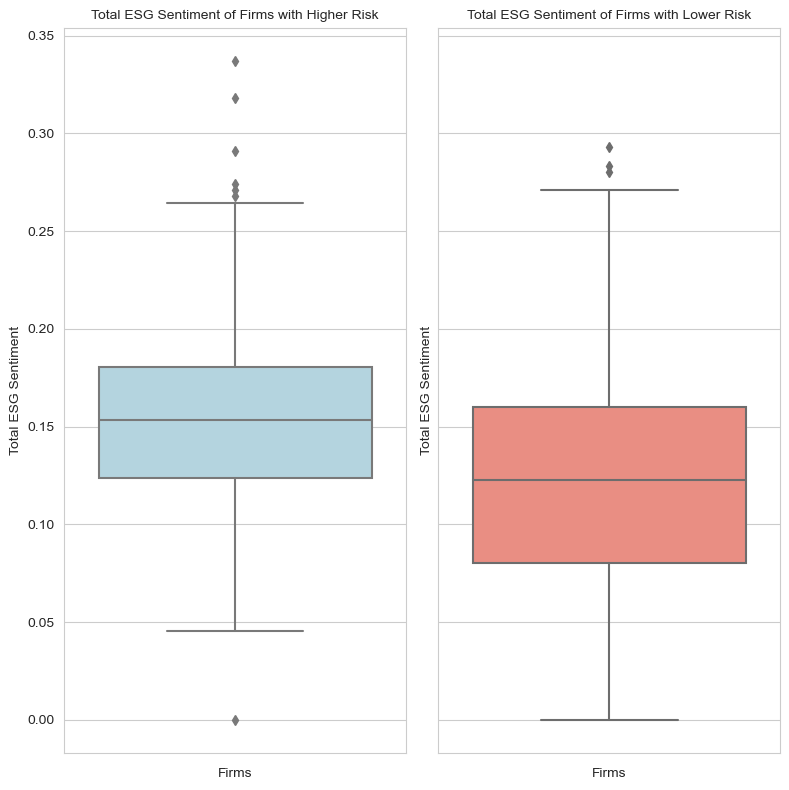

In [18]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and a set of subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(8, 8), sharey=True)  # 1 row, 2 columns, with shared y-axis

# First subplot for 'Total ESG Sentiment' where 'solvency' <= 26, using a lightblue color
sns.boxplot(y=df['Total ESG Sentiment'][df['solvency'] <= 26], ax=axs[0], color='lightblue')
axs[0].set_title('Total ESG Sentiment of Firms with Higher Risk', fontsize=10)
axs[0].set_xlabel('Firms', fontsize=10)
axs[0].set_ylabel('Total ESG Sentiment', fontsize=10)

# Second subplot for 'Total ESG Sentiment' where 'solvency' > 56, using a salmon color
sns.boxplot(y=df['Total ESG Sentiment'][df['solvency'] > 56], ax=axs[1], color='salmon')
axs[1].set_title('Total ESG Sentiment of Firms with Lower Risk', fontsize=10)
axs[1].set_xlabel('Firms', fontsize=10)
# No need to set y-label for the second subplot due to shared y-axis

# Adjust the layout so that the titles and labels don't overlap and everything fits
plt.tight_layout()

# Display the boxplots
plt.show()

## Wordcloud

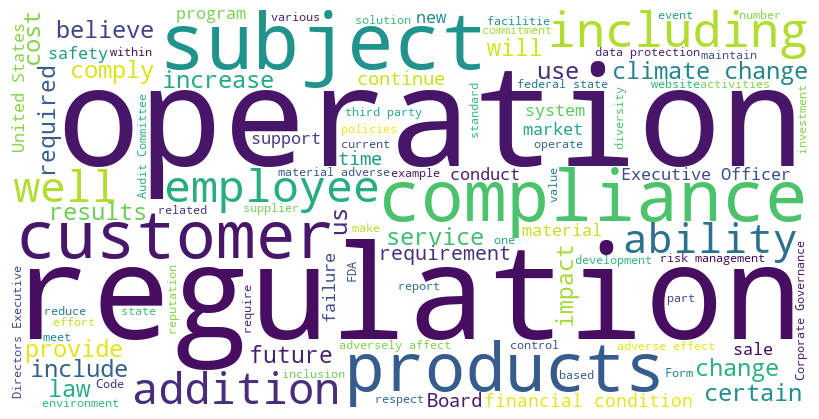

In [19]:
all_text = ' '.join(df['Content'].tolist())
word_cloud_plot(all_text)

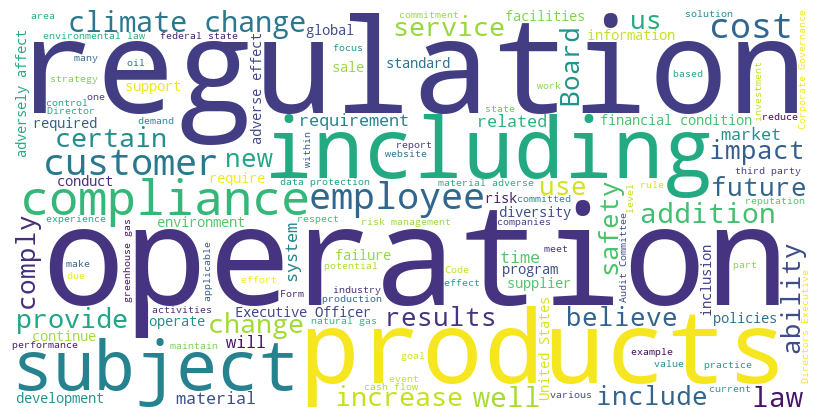

In [20]:
# plot word cloud for firms with better performance
all_text = ' '.join(df[df["roe"] > 20]['Content'].tolist())
word_cloud_plot(all_text)

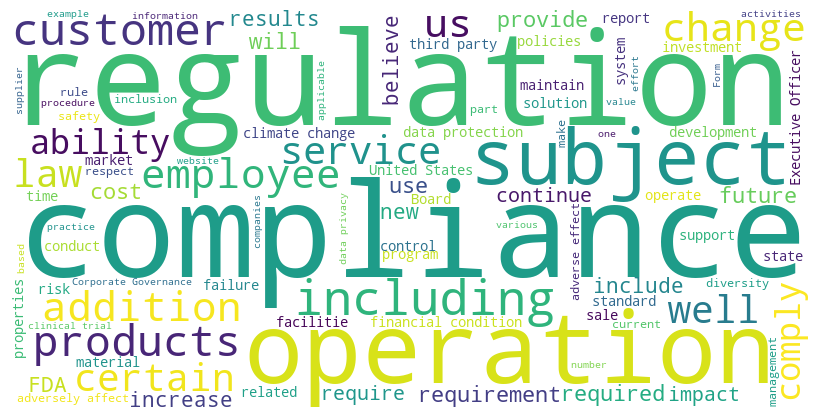

In [21]:
# plot word cloud for firms with worse performance
all_text = ' '.join(df[df["roe"] < 5]['Content'].tolist())

word_cloud_plot(all_text)

## Regression Analysis

In [22]:
# main regression
X = df[['roe',"asset_log","solvency"]]
y = df['Total ESG Sentiment']

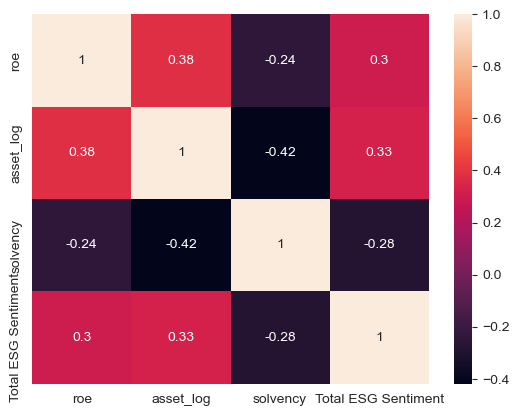

In [23]:
# heat plot for simple correlation
plot_heatmap(X,y)

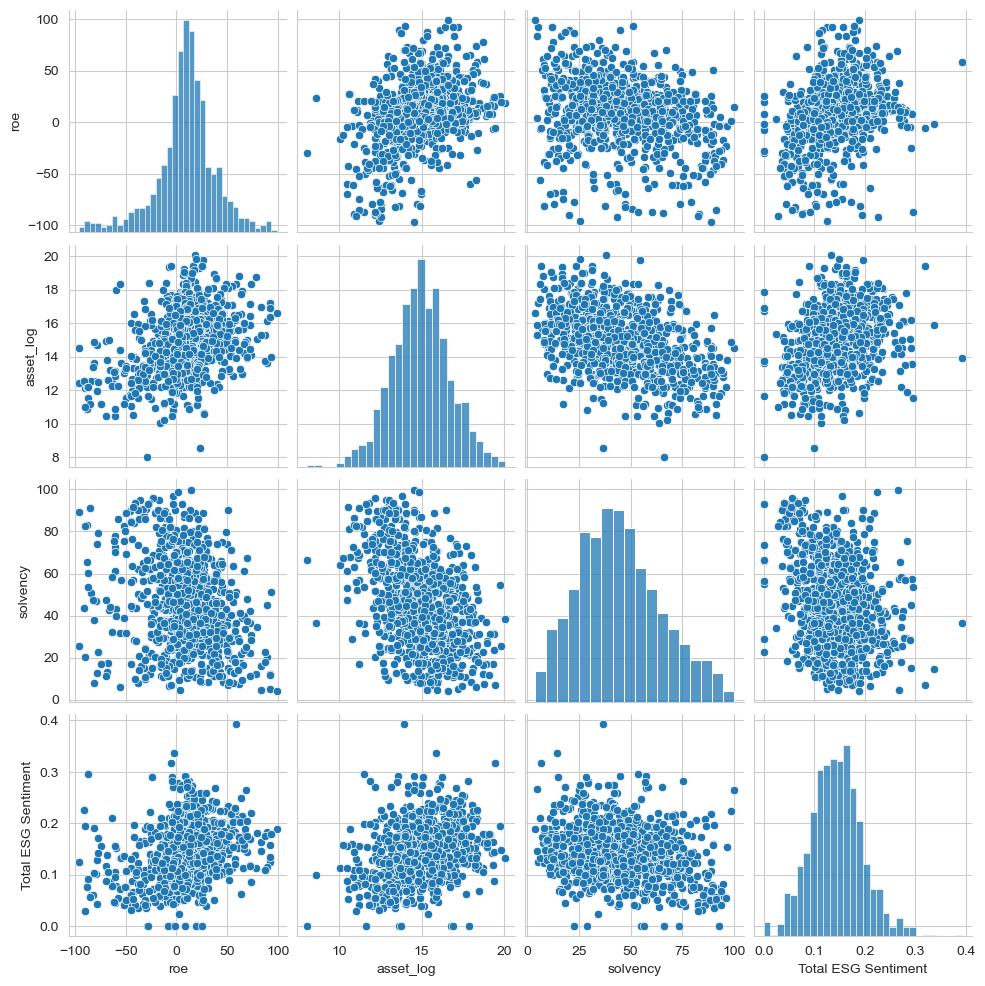

In [24]:
# pair plot for simple correlation
plot_pairplot(X,y)

In [25]:
# OLS regression with heteroskedasticity
model = olsreg_heteroskedasticity(X,y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Total ESG Sentiment   R-squared:                       0.161
Model:                             OLS   Adj. R-squared:                  0.158
Method:                  Least Squares   F-statistic:                     53.70
Date:                 Mon, 04 Mar 2024   Prob (F-statistic):           3.86e-32
Time:                         20:00:47   Log-Likelihood:                 1590.5
No. Observations:                  984   AIC:                            -3173.
Df Residuals:                      980   BIC:                            -3153.
Df Model:                            3                                         
Covariance Type:                   HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0871      0.010      8.593      0.000       0.067       0.107
roe            0.0644      0.012      5.495      0.000       0.041       0.087
asset_log      0.0672      0.012      5.478      0.000       0.043       0.091
solvency      -0.0398      0.008     -4.770      0.000      -0.056      -0.023
==============================================================================
Omnibus:                       79.759   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.502
Skew:                           0.546   Prob(JB):                     2.54e-32
Kurtosis:                       4.535   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

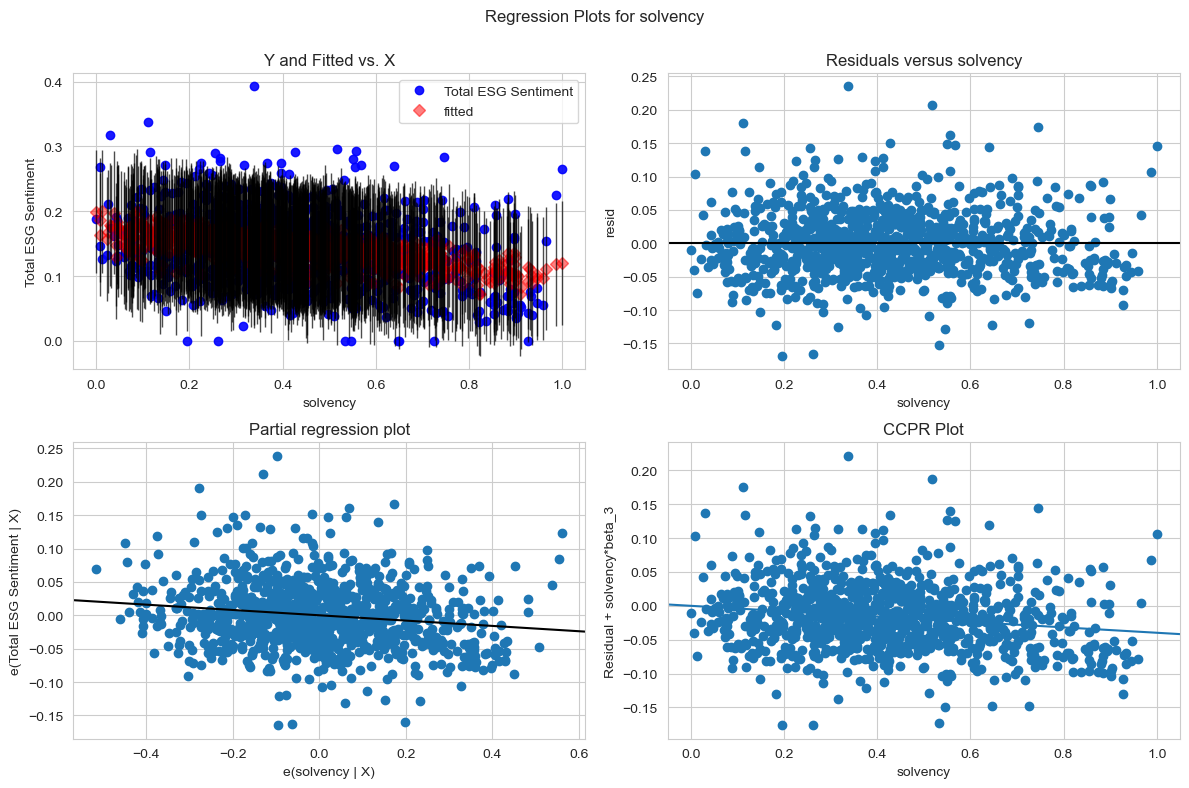

In [26]:
# residual analysis to remove outliers
plot_residual_analysis(model, "solvency")

In [27]:
# regressions for separate "E", "S", "G" scores
y = df["Total Environmental Sentiment"]
model = olsreg_heteroskedasticity(X,y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Total Environmental Sentiment   R-squared:                       0.095
Model:                                       OLS   Adj. R-squared:                  0.092
Method:                            Least Squares   F-statistic:                     28.86
Date:                           Mon, 04 Mar 2024   Prob (F-statistic):           6.98e-18
Time:                                   20:00:55   Log-Likelihood:                 1777.1
No. Observations:                            984   AIC:                            -3546.
Df Residuals:                                980   BIC:                            -3527.
Df Model:                                      3                                         
Covariance Type:                             HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.009     -0.385      0.701      -0.020       0.014
roe            0.0379      0.010      3.758      0.000       0.018       0.058
asset_log      0.0555      0.010      5.322      0.000       0.035       0.076
solvency      -0.0125      0.007     -1.927      0.054      -0.025       0.000
==============================================================================
Omnibus:                      265.725   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.778
Skew:                           1.458   Prob(JB):                    4.31e-135
Kurtosis:                       5.568   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [28]:
y = df["Total Social Sentiment"]
model = olsreg_heteroskedasticity(X,y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Social Sentiment   R-squared:                       0.055
Model:                                OLS   Adj. R-squared:                  0.052
Method:                     Least Squares   F-statistic:                     22.29
Date:                    Mon, 04 Mar 2024   Prob (F-statistic):           5.80e-14
Time:                            20:00:59   Log-Likelihood:                 2322.1
No. Observations:                     984   AIC:                            -4636.
Df Residuals:                         980   BIC:                            -4617.
Df Model:                               3                                         
Covariance Type:                      HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0322      0.005      6.878      0.000       0.023       0.041
roe            0.0163      0.005      3.197      0.001       0.006       0.026
asset_log      0.0147      0.006      2.494      0.013       0.003       0.026
solvency      -0.0129      0.004     -3.503      0.000      -0.020      -0.006
==============================================================================
Omnibus:                       73.061   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.295
Skew:                           0.650   Prob(JB):                     9.08e-21
Kurtosis:                       3.748   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [29]:
y = df["Total Governance Sentiment"]
model = olsreg_heteroskedasticity(X,y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Total Governance Sentiment   R-squared:                       0.010
Model:                                    OLS   Adj. R-squared:                  0.007
Method:                         Least Squares   F-statistic:                     4.188
Date:                        Mon, 04 Mar 2024   Prob (F-statistic):            0.00588
Time:                                20:01:01   Log-Likelihood:                 1896.0
No. Observations:                         984   AIC:                            -3784.
Df Residuals:                             980   BIC:                            -3764.
Df Model:                                   3                                         
Covariance Type:                          HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0582      0.007      8.624      0.000       0.045       0.071
roe            0.0102      0.009      1.164      0.245      -0.007       0.027
asset_log     -0.0030      0.009     -0.343      0.731      -0.020       0.014
solvency      -0.0144      0.006     -2.426      0.015      -0.026      -0.003
==============================================================================
Omnibus:                      678.548   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9614.160
Skew:                           3.029   Prob(JB):                         0.00
Kurtosis:                      17.064   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [30]:
# robustness check by adding interaction term
X = df[['roe',"asset_log","solvency", "roe_asset_log"]]
y = df['Total ESG Sentiment']

In [31]:
model = olsreg_heteroskedasticity(X,y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Total ESG Sentiment   R-squared:                       0.164
Model:                             OLS   Adj. R-squared:                  0.161
Method:                  Least Squares   F-statistic:                     40.85
Date:                 Mon, 04 Mar 2024   Prob (F-statistic):           1.09e-31
Time:                         20:01:05   Log-Likelihood:                 1592.4
No. Observations:                  984   AIC:                            -3175.
Df Residuals:                      979   BIC:                            -3150.
Df Model:                            4                                         
Covariance Type:                   HC3                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0873      0.010      8.390      0.000       0.067       0.108
roe               0.2150      0.094      2.276      0.023       0.030       0.400
asset_log         0.0710      0.013      5.645      0.000       0.046       0.096
solvency         -0.0396      0.008     -4.732      0.000      -0.056      -0.023
roe_asset_log    -0.1640      0.098     -1.668      0.095      -0.357       0.029
==============================================================================
Omnibus:                       82.867   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.027
Skew:                           0.558   Prob(JB):                     3.58e-34
Kurtosis:                       4.585   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [37]:
df2 = pd.read_csv('data_2022_cleaned.csv')
X = df2[['Total ESG Sentiment',"asset_log","solvency"]]
y = df2['roe_lag']

In [38]:
# regression about consumer confidence
# use 2023 roe as dep variable and 2022 sentiment as ind var
model = olsreg_heteroskedasticity(X,y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                roe_lag   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     49.74
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.41e-29
Time:                        17:50:39   Log-Likelihood:                -3932.5
No. Observations:                 838   AIC:                             7873.
Df Residuals:                     834   BIC:                             7892.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -13.9889      5.316     -2.631      0.009     -24.409      -3.569
Total ESG Sentiment   -33.3852     10.530     -3.171      0.002     -54.024     -12.747
asset_log              70.2126      6.615     10.613      0.000      57.246      83.179
solvency               -8.3549      5.464     -1.529      0.126     -19.065       2.355
==============================================================================
Omnibus:                       49.795   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.965
Skew:                          -0.327   Prob(JB):                     3.99e-26
Kurtosis:                       4.709   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""